## Member Team :
## - Arrafiatu Arsy Almas 101320068
## - Kemal Reviansyah Hermawanto

In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Chapter4_Geomechanics_DataSet.csv')
df

,Closure Pressure (psi),YM (MMpsi),PR
0,11421.780480,4.744385,0.369135
1,10775.655920,4.745286,0.353307
2,11682.047010,4.734561,0.347007
3,10778.932700,4.744971,0.365548
4,9937.883140,4.751685,0.255453
...,...,...,...
1002,9563.050842,4.956995,0.395388
1003,7683.981966,4.651399,0.266581
1004,7328.404834,4.651376,0.266708
1005,7884.131274,4.651383,0.257703


In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[ 0.86891975, -0.64662441,  1.80556814],
       [ 0.576779  , -0.64434448,  1.56568504],
       [ 0.98659747, -0.67147565,  1.47020246],
       ...,
       [-0.98187174, -0.88190785,  0.25321532],
       [-0.73060387, -0.88188999,  0.11674766],
       [-0.85179379, -0.88187031, -0.02933039]])

In [4]:
from sklearn.neighbors import NearestNeighbors

Neighbors = NearestNeighbors(n_neighbors=2)
nbrs = Neighbors.fit(df_scaled)
distances, indices=nbrs.kneighbors(df_scaled)

In [5]:
distances

array([[0.        , 0.09987277],
       [0.        , 0.11768644],
       [0.        , 0.15363125],
       ...,
       [0.        , 0.16078324],
       [0.        , 0.05939761],
       [0.        , 0.11486115]])

In [6]:
np.sort(distances[:,1])

array([0.        , 0.        , 0.        , ..., 0.71778324, 0.74614667,
       1.0756681 ])

In [7]:
indices

array([[   0,  589],
       [   1,  383],
       [   2,  192],
       ...,
       [1004, 1003],
       [1005,  989],
       [1006,  285]], dtype=int64)

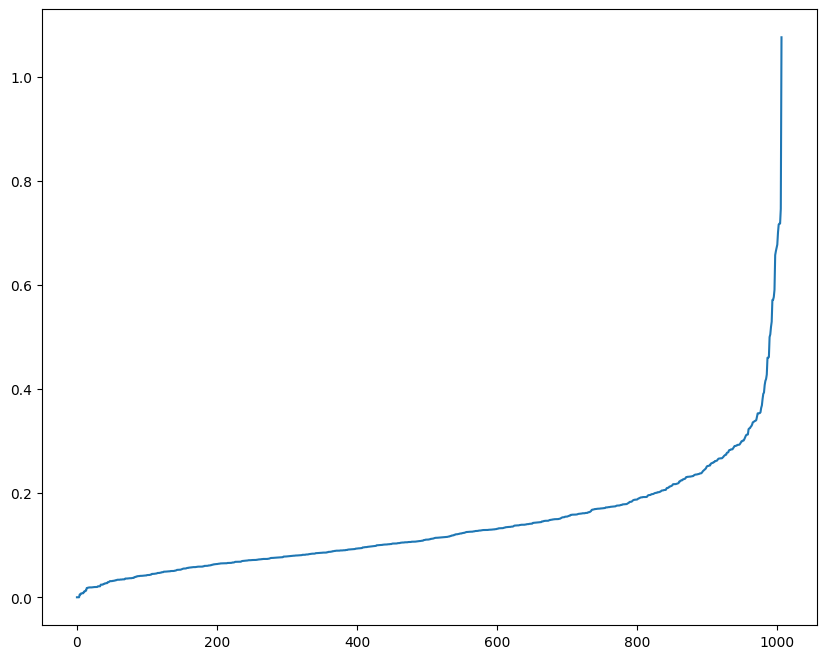

In [8]:
fig = plt.figure(figsize=(10,8))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [9]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.6, min_samples=5).fit_predict(df_scaled)

In [10]:
clustering

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
pd.DataFrame(clustering).value_counts()

 0    996
-1     11
dtype: int64

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled,clustering)

0.31089817797323344

In [13]:
eps_range = [0.5, 0.6, 0.7, 0.8]
sample_range = [6, 10, 15]
epsilon = []
min_sample =[]
sil_score=[]
for i in range(len(eps_range)):
  for j in range(len(sample_range)):
    clustering = DBSCAN(eps=eps_range[i], min_samples=sample_range[j]).fit_predict(df_scaled)
    print('eps = ', eps_range[i])
    print('min_samples = ', sample_range[j])
    print(pd.DataFrame(clustering).value_counts())
    print(silhouette_score(df_scaled, clustering))
    epsilon.append(eps_range[i])
    min_sample.append(sample_range[j])
    sil_score.append(silhouette_score(df_scaled, clustering))


eps =  0.5
min_samples =  6
 0    969
-1     38
dtype: int64
0.22594254437133873
eps =  0.5
min_samples =  10
 0    958
-1     49
dtype: int64
0.21704931392260204
eps =  0.5
min_samples =  15
 0    923
-1     84
dtype: int64
0.20995538592526714
eps =  0.6
min_samples =  6
 0    993
-1     14
dtype: int64
0.3070270522907306
eps =  0.6
min_samples =  10
 0    986
-1     21
dtype: int64
0.3069395107860748
eps =  0.6
min_samples =  15
 0    971
-1     36
dtype: int64
0.256327233818658
eps =  0.7
min_samples =  6
 0    1000
-1       7
dtype: int64
0.3419721472187698
eps =  0.7
min_samples =  10
 0    995
-1     12
dtype: int64
0.3132396372146653
eps =  0.7
min_samples =  15
 0    992
-1     15
dtype: int64
0.3041174676347182
eps =  0.8
min_samples =  6
 0    1003
-1       4
dtype: int64
0.3091795830416467
eps =  0.8
min_samples =  10
 0    1002
-1       5
dtype: int64
0.3509044566352336
eps =  0.8
min_samples =  15
 0    1000
-1       7
dtype: int64
0.38471538637195957


In [14]:
min_sample

[6, 10, 15, 6, 10, 15, 6, 10, 15, 6, 10, 15]

In [15]:
tabel = pd.DataFrame(list(zip(epsilon,min_sample,sil_score)),
                    columns=["Epsilon", "Min Sample", "Silhouette Score"])
tabel

,Epsilon,Min Sample,Silhouette Score
0,0.5,6,0.225943
1,0.5,10,0.217049
2,0.5,15,0.209955
3,0.6,6,0.307027
4,0.6,10,0.306940
5,0.6,15,0.256327
6,0.7,6,0.341972
7,0.7,10,0.313240
8,0.7,15,0.304117
9,0.8,6,0.309180


In [16]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['clusters']=clustering
df_scaled

,Closure Pressure (psi),YM (MMpsi),PR,clusters
0,0.868920,-0.646624,1.805568,0
1,0.576779,-0.644344,1.565685,0
2,0.986597,-0.671476,1.470202,0
3,0.578261,-0.645142,1.751212,0
4,0.197986,-0.628157,0.082645,0
...,...,...,...,...
1002,0.028508,-0.108789,2.203446,0
1003,-0.821100,-0.881849,0.251293,0
1004,-0.981872,-0.881908,0.253215,0
1005,-0.730604,-0.881890,0.116748,0


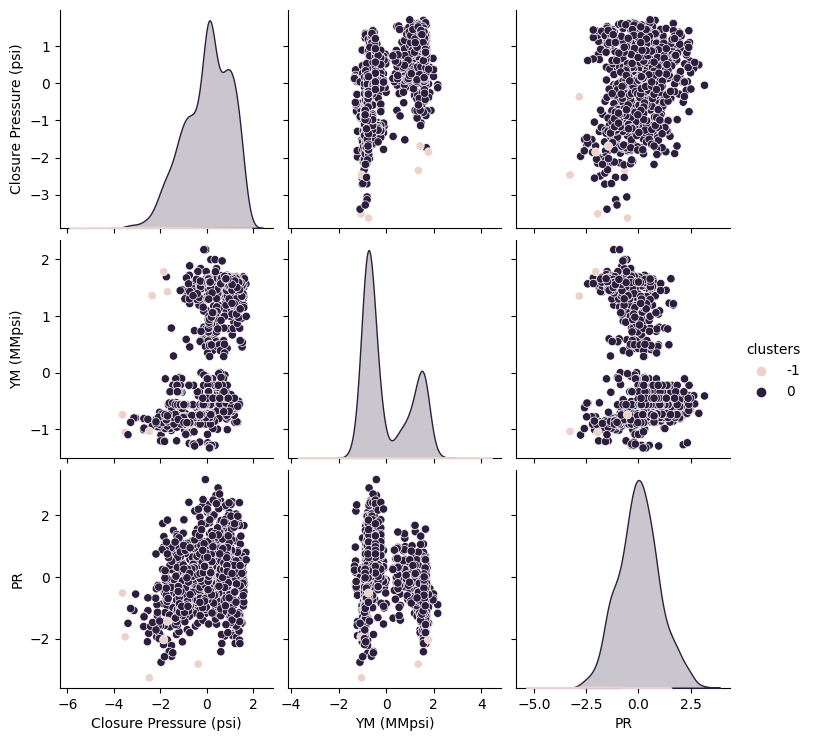

In [17]:
sns.pairplot(df_scaled, hue="clusters")

In [18]:
ti = df_scaled.drop(["Closure Pressure (psi)", "YM (MMpsi)", "PR"],axis=1)

In [19]:
df['clusters'] = ti

In [20]:
df

,Closure Pressure (psi),YM (MMpsi),PR,clusters
0,11421.780480,4.744385,0.369135,0
1,10775.655920,4.745286,0.353307,0
2,11682.047010,4.734561,0.347007,0
3,10778.932700,4.744971,0.365548,0
4,9937.883140,4.751685,0.255453,0
...,...,...,...,...
1002,9563.050842,4.956995,0.395388,0
1003,7683.981966,4.651399,0.266581,0
1004,7328.404834,4.651376,0.266708,0
1005,7884.131274,4.651383,0.257703,0


<Axes: xlabel='clusters', ylabel='Closure Pressure (psi)'>

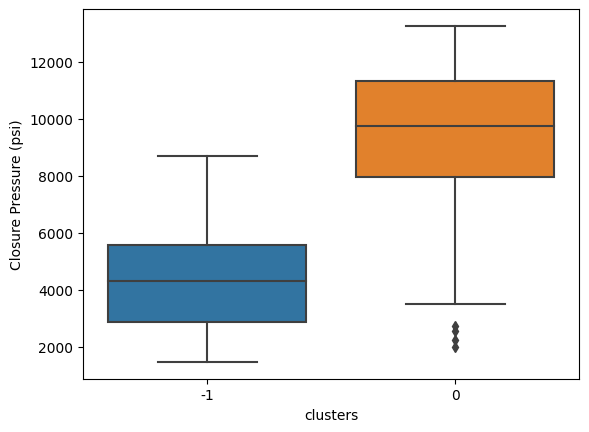

In [24]:
sns.boxplot(df, x="clusters", y="Closure Pressure (psi)")

<Axes: xlabel='clusters', ylabel='YM (MMpsi)'>

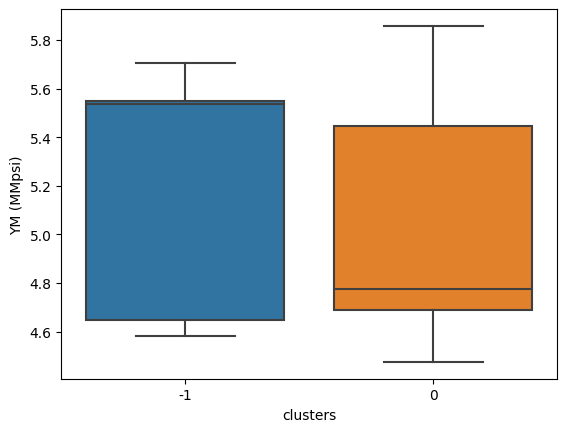

In [25]:
sns.boxplot(df, x="clusters", y="YM (MMpsi)")

<Axes: xlabel='clusters', ylabel='PR'>

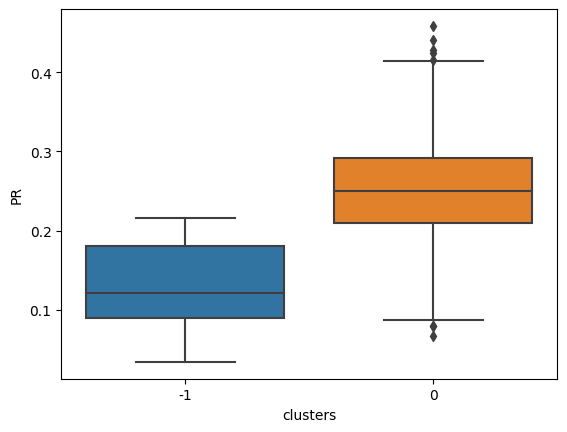

In [26]:
sns.boxplot(df, x="clusters", y="PR")